In [4]:
!pip install seaborn

# Chang Woon Jang

Netflix dataset (netflix_titles.csv [1]) from Kaggle was used to analyze the production of movies and TV shows. This analysis shows the trend of netflix production in the past from 2006 to 2021. 

    * Trend of Netflix TV shows and Movie produced in the past from 2006 to 2021. (bar chart)
    * Overall, the total number of movies each year is higher than that of TV shows. 
    * Netflix TV show continues to increase. In 2021, the total number of TV shows surpass 
    that of movies. 
    
    
Refereces

[1] Netflix Movies and TV Shows, accessed 09 May 2022, <https://www.kaggle.com/datasets/shivamb/netflix-shows>

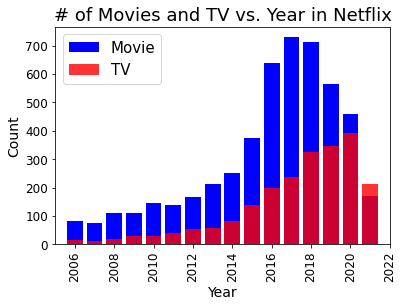

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import re

netflix = pd.read_csv("./Resources/netflix_titles.csv")

# Drop columns that is not needed
netflix_df = netflix[['type', 'release_year', 'country']]
netflix_df = netflix_df.dropna(axis=0)

# list of movie and tv by year and type
movie_maps = []
tv_maps = []

# Store Type and Year into lists of movie_maps and tv_maps 
for index, row in netflix_df.iterrows():
    if netflix_df.loc[index, 'release_year'] > 2005 and netflix_df.loc[index, 'type'] == "Movie":
        
        movie_maps.append([netflix_df.loc[index, 'release_year'], netflix_df.loc[index, 'type']])
        
    elif netflix_df.loc[index, 'release_year'] > 2005 and netflix_df.loc[index, 'type'] == "TV Show":
        
        tv_maps.append([netflix_df.loc[index, 'release_year'], netflix_df.loc[index, 'type']])

# data frame for TV and Movie
tv_df = pd.DataFrame(tv_maps)
movie_df = pd.DataFrame(movie_maps)

# Group by Year and Count number of TV Shows and Movies
groupby_tv = tv_df.groupby(0).count().reset_index() 
groupby_movie = movie_df.groupby(0).count().reset_index() 

# Merge Group by TV Shows and Movies into DataFrame
merge_df = groupby_tv.merge(groupby_movie, left_on=0, right_on=0)
merge_df.rename(columns = {0:'Year', '1_x':'TV', '1_y':'Movie'}, inplace = True)

# Matplot bar graph of Movie and TV counts by Year
plt.bar(merge_df['Year'], merge_df['Movie'], color='b')
plt.bar(merge_df['Year'], merge_df['TV'], color='r', alpha=0.8)

plt.xlabel("Year", size=14)
plt.xticks(fontsize=12, rotation=90)
plt.xlim(2005, 2022)
plt.ylabel("Count", size=14)
plt.yticks(fontsize=12)
plt.title("# of Movies and TV vs. Year in Netflix", size=18)

plt.legend(['Movie', 'TV'], loc='upper left', fontsize=15)

plt.savefig("./Images/Movie-TV-Count-By-Year.png");


#  Ratio of TV shows to Movie. (line graph)
    
    * In this analysis, the ratio of TV show to movie is shown from 2016 to 2021. From 2017, the ratio drastically 
    increases, indicating that the tv show is more produced than movie. 

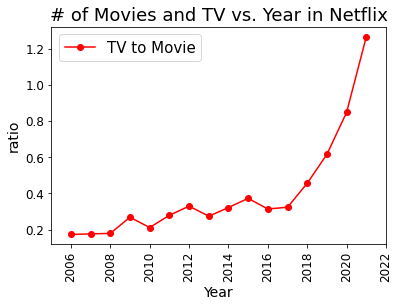

In [122]:
#TV to Movie Ratio

plt.plot(groupby_tv[0], groupby_tv[1]/groupby_movie[1], 'r', marker='o')

plt.xlabel("Year", size=14)
plt.xticks(fontsize=12, rotation=90)
plt.xlim(2005, 2022)
plt.ylabel("ratio", size=14)
plt.yticks(fontsize=12)

plt.title("# of Movies and TV vs. Year in Netflix", size=18)

plt.legend(['TV to Movie'], loc='upper left', fontsize=15)

plt.savefig("./Images/TV_To_Movie_Ratio.png");

# TV Show and Movie in America
    * Bar graph, showing the trend of TV shows and movies only in America

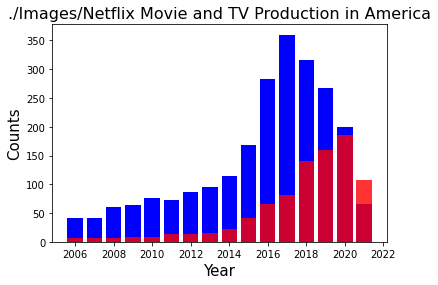

In [112]:
#movie_duration_df = netflix.loc[netflix['type'] == 'Movie'][['type', 'country', 'duration']].dropna(axis=0)
#TV_duration_df = netflix.loc[netflix['type'] == 'TV Show'][['type', 'country', 'duration']].dropna(axis=0)

#for index, row in temp.iterrows():
america = []
korea = []
china = []
india = []
unitedk = []
southaf = []

for index, row in netflix_df.iterrows():
    if 'United States' in netflix_df.loc[index, 'country'].split(", "):
        america.append(netflix_df.loc[index, :])
    elif 'South Korea' in netflix_df.loc[index, 'country'].split(", "):
        korea.append(netflix_df.loc[index, :])
    elif 'China' in netflix_df.loc[index, 'country'].split(", "):
        china.append(netflix_df.loc[index, :]) 
    elif 'India' in netflix_df.loc[index, 'country'].split(", "):
        india.append(netflix_df.loc[index, :]) 
    elif 'United Kingdom' in netflix_df.loc[index, 'country'].split(", "):
        unitedk.append(netflix_df.loc[index, :])
    elif 'South Africa' in netflix_df.loc[index, 'country'].split(", "):
        southaf.append(netflix_df.loc[index, :])    
        
america_df = pd.DataFrame(america)
korea_df = pd.DataFrame(korea)
china_df = pd.DataFrame(china)
india_df = pd.DataFrame(india)
unitedk_df = pd.DataFrame(unitedk)
southaf_df = pd.DataFrame(southaf)

result_df = america_df

# list of movie and tv by year and type
movie_maps1 = []
tv_maps1 = []

# Store Type and Year into movie_maps and tv_maps 
for index, row in result_df.iterrows():
    if result_df.loc[index, 'release_year'] > 2005 and result_df.loc[index, 'type'] == "Movie":
        movie_maps1.append([result_df.loc[index, 'release_year'], result_df.loc[index, 'type']])
        
    elif result_df.loc[index, 'release_year'] > 2005 and result_df.loc[index, 'type'] == "TV Show":
        tv_maps1.append([result_df.loc[index, 'release_year'], result_df.loc[index, 'type']])


tv_df1 = pd.DataFrame(tv_maps1)
movie_df1 = pd.DataFrame(movie_maps1)

groupby_tv1 = tv_df1.groupby(0).count().reset_index() 
groupby_movie1 = movie_df1.groupby(0).count().reset_index() 

merge_df1 = groupby_tv1.merge(groupby_movie1, left_on=0, right_on=0)
merge_df1.rename(columns = {0:'Year', '1_x':'TV', '1_y':'Movie'}, inplace = True)


plt.bar(merge_df1['Year'], merge_df1['Movie'], color='b')
plt.bar(merge_df1['Year'], merge_df1['TV'], color='r', alpha=0.8)
plt.xlabel("Year", size=15)
plt.ylabel("Counts", size=15)
plt.title("./Images/Netflix Movie and TV Production in America", size=16)
plt.show()


# Ratio of TV shows to Movies. Comparison of world to America
    * line graph

# TV to Movie ratio by year. Comparison: World to America. 

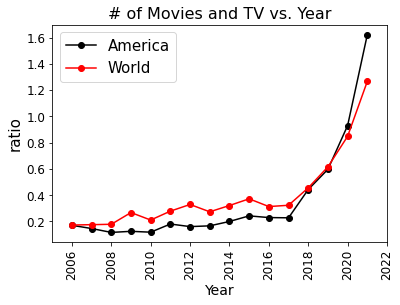

In [113]:
merge_df1['ratio_america']= merge_df1['TV']/merge_df1['Movie']
plt.plot(merge_df1['Year'], merge_df1['ratio_america'], color='black', marker='o')

plt.xlabel("Year", size=14)
plt.xticks(fontsize=12, rotation=90)
plt.xlim(2005, 2022)
plt.ylabel("ratio", size=15)
plt.yticks(fontsize=12)

plt.plot(groupby_tv[0], groupby_tv[1]/groupby_movie[1], 'r', marker='o')
plt.title("# of Movies and TV vs. Year", size=16)

plt.legend(['America', 'World'], loc='upper left', fontsize=15)

plt.savefig("./Images/TV_To_Movie_Ratio_America.png");



In [114]:
# Dataset import
netflix_path = "./Resources/netflix_titles.csv"
netflix_df = pd.read_csv(netflix_path)
netflix_df = netflix_df.dropna()

netflix_sortbyyear_df = netflix_df.sort_values(by=['release_year'], ascending=False)
netflix_sortbyyear_df

df_2018 = netflix_sortbyyear_df.loc[netflix_sortbyyear_df['release_year'] == 2018]
df_2019 = netflix_sortbyyear_df.loc[netflix_sortbyyear_df['release_year'] == 2019]
df_2020 = netflix_sortbyyear_df.loc[netflix_sortbyyear_df['release_year'] == 2020]
df_2021 = netflix_sortbyyear_df.loc[netflix_sortbyyear_df['release_year'] == 2021]

country_2018 = pd.DataFrame(df_2018['country'].value_counts())
country_2019 = pd.DataFrame(df_2019['country'].value_counts())
country_2020 = pd.DataFrame(df_2020['country'].value_counts())
country_2021 = pd.DataFrame(df_2021['country'].value_counts())

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


# Netflix production by country from 2019 to 2021

Number of Shows in 2019: 381
Number of Shows in 2020: 349
Number of Shows in 2021: 83


,release_year
rating,
PG,26260
PG-13,36360
R,92920
TV-14,151500
TV-G,36360
TV-MA,422180
TV-PG,54540
TV-Y,50500
TV-Y7,22220


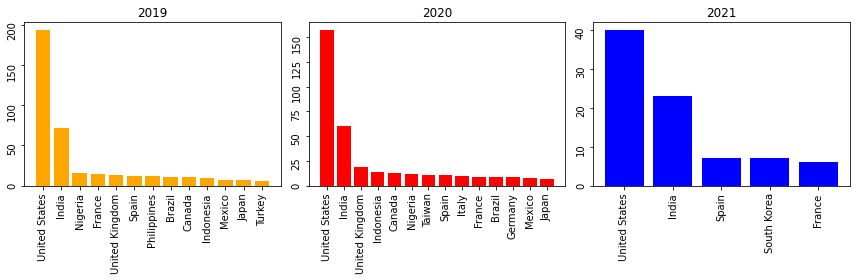

In [115]:
# Print Number of Shows from 2019 to 2021
print(f"Number of Shows in 2019: {country_2019.loc[country_2019['country'] > 5].sum()[0]}")
print(f"Number of Shows in 2020: {country_2020.loc[country_2020['country'] > 5].sum()[0]}")
print(f"Number of Shows in 2021: {country_2021.loc[country_2021['country'] > 5].sum()[0]}")

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

df1=(country_2019.loc[country_2019['country'] > 5])
ax1.bar(df1.index, df1['country'], color='orange')
ax1.tick_params(labelrotation=90)
ax1.set_title("2019")

df2=(country_2020.loc[country_2020['country'] > 5])
ax2.bar(df2.index, df2['country'], color='r')
ax2.tick_params(labelrotation=90)
ax2.set_title("2020")

df3=(country_2021.loc[country_2021['country'] > 5])
ax3.bar(df3.index, df3['country'], color='b')
ax3.tick_params(labelrotation=90)
ax3.set_title("2021")

fig1.tight_layout()

plt.savefig("./Images/Country_Production.png")

df_2020.groupby('rating').sum()

# Percentage of netflix production by rating

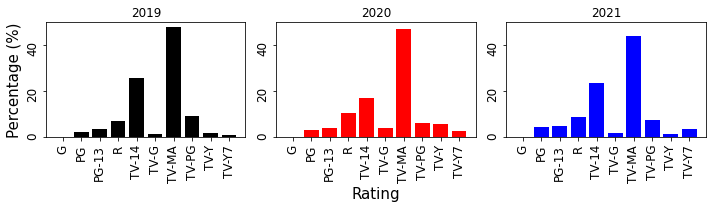

In [123]:
fig2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(10,3))

rating_2018 = df_2019.groupby('rating').sum()
rating_2019 = df_2019.groupby('rating').sum()/1047861*100
rating_2020 = df_2020.groupby('rating').sum()/892840*100
rating_2021 = df_2021.groupby('rating').sum()/325381*100

new_index = ['G', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7']

rating_2020 = pd.DataFrame(rating_2020['release_year'], index=new_index)
rating_2021 = pd.DataFrame(rating_2021['release_year'], index=new_index)
rating_2020 = rating_2020.fillna(0)
rating_2021 = rating_2021.fillna(0)

ax4.bar(rating_2019.index, rating_2019['release_year'], color='black')
ax4.set_ylim(0, 50)
ax4.set_ylabel("Percentage (%)", size=15)
ax4.tick_params(labelrotation=90, labelsize=12)
ax4.set_title("2019")

ax5.bar(rating_2020.index, rating_2020['release_year'], color='r')
ax5.set_xlabel("Rating", size=15)
ax5.set_ylim(0, 50)
ax5.tick_params(labelrotation=90, labelsize=12)
ax5.set_title("2020")

ax6.bar(rating_2021.index, rating_2021['release_year'], color='b')
ax6.set_ylim(0, 50)
ax6.tick_params(labelrotation=90, labelsize=12)
ax6.set_title("2021")

fig2.tight_layout()
plt.savefig("./Images/Rating.png")
plt.show()



# Trend of netflix production by rating

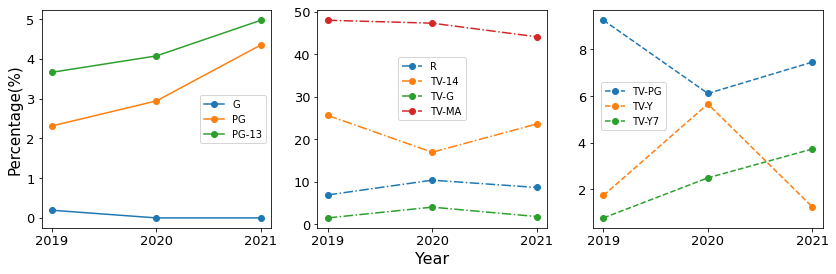

In [124]:
# Merge rating data frames from 2019 to 2021
temp_df = pd.merge(rating_2019, rating_2020, left_index=True, right_index=True)
merged_df = pd.merge(temp_df, rating_2021, left_index=True, right_index=True)
merged_df = merged_df.rename(columns={'release_year_x': '2019',
                                      'release_year_y': '2020',
                                      'release_year': '2021'})

fig3, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(14,4))
    
ax7.plot(merged_df.T.iloc[:, 0:3], marker='o')
ax7.legend(merged_df.T.iloc[:, 0:3])
ax7.set_ylabel("Percentage(%)", size=15)
ax7.tick_params(labelsize=13)

ax8.plot(merged_df.T.iloc[:, 3:7], marker='o', linestyle='-.')
ax8.legend(merged_df.T.iloc[:, 3:7], loc='center', bbox_to_anchor=(0.5, 0.64))
ax8.set_xlabel("Year", size=16)
ax8.tick_params(labelsize=13)

ax9.plot(merged_df.T.iloc[:, 7:11], marker='o', linestyle='dashed')
ax9.legend(merged_df.T.iloc[:, 7:11], bbox_to_anchor=(0.34, 0.56))
ax9.tick_params(labelsize=13)

plt.savefig("./Images/Line_RatingbyYear.png")


# Pie chart - Rolly

This visualization shows the percentage ratio of both tv shows and movies, and the top 10 genres distributed by Netflix in general for both tv shows and movies in the last three years.

In [6]:
# Study data files
titles_path = "./Resources/netflix_titles.csv"

titles_df = pd.read_csv(titles_path)
titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# cleaning data

for i in titles_df.columns:
    null_rate = titles_df[i].isna().sum() / len(titles_df) * 100 
        
titles_df['country'] = titles_df['country'].fillna(titles_df['country'].mode()[0])
titles_df['cast'].replace(np.nan, 'No Data',inplace  = True)
titles_df['director'].replace(np.nan, 'No Data',inplace  = True)

titles_df.dropna(inplace=True)
titles_df.drop_duplicates(inplace= True)   

titles_df["date_added"] = pd.to_datetime(titles_df['date_added'])
titles_df['month_added']=titles_df['date_added'].dt.month
titles_df['month_name_added']=titles_df['date_added'].dt.month_name()
titles_df['year_added'] = titles_df['date_added'].dt.year

titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


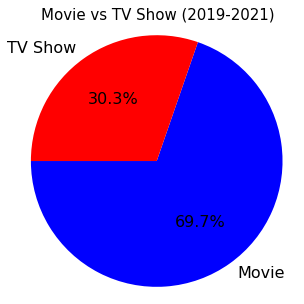

In [8]:
# Count title type, and plot the percentage ratio of movie vs tv show
title_type = titles_df["type"].value_counts()
plt.figure(figsize=(5,5))
plt.title('Movie vs TV Show (2019-2021)', size=15)
pies = ["Movie", "TV Show"]
pie_type = [6126,2664]
colors = ["blue", "red"]

# create a pie chart based upon the above data
plt.pie(pie_type, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180, textprops={"fontsize":16})

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig('./Images/%ratio_movie_tvshow.png')
plt.show()

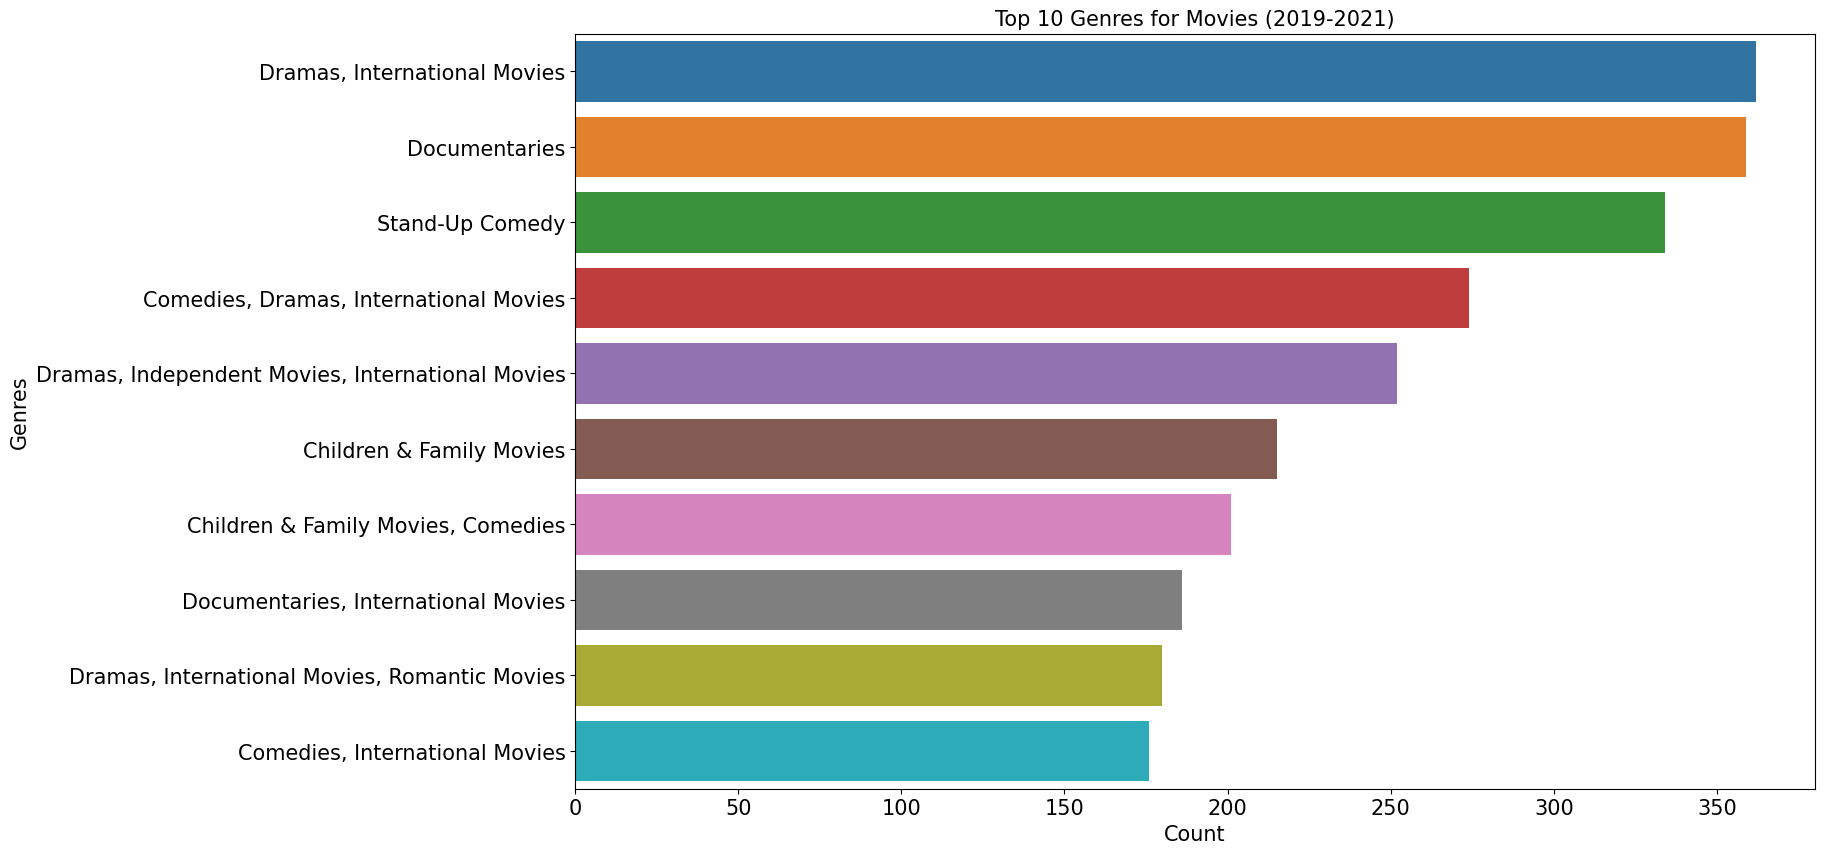

In [9]:
movie_genres  = titles_df['listed_in'][titles_df.type == 'Movie']

plt.figure(figsize=(16,10), dpi=100)
genre = sns.countplot(y = movie_genres, order=movie_genres.value_counts().index[:10])
plt.title('Top 10 Genres for Movies (2019-2021)', size=15)
plt.xlabel('Count', size=15)
plt.ylabel('Genres', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('../The-First-Project/top10_movie_genres.png')
plt.show()

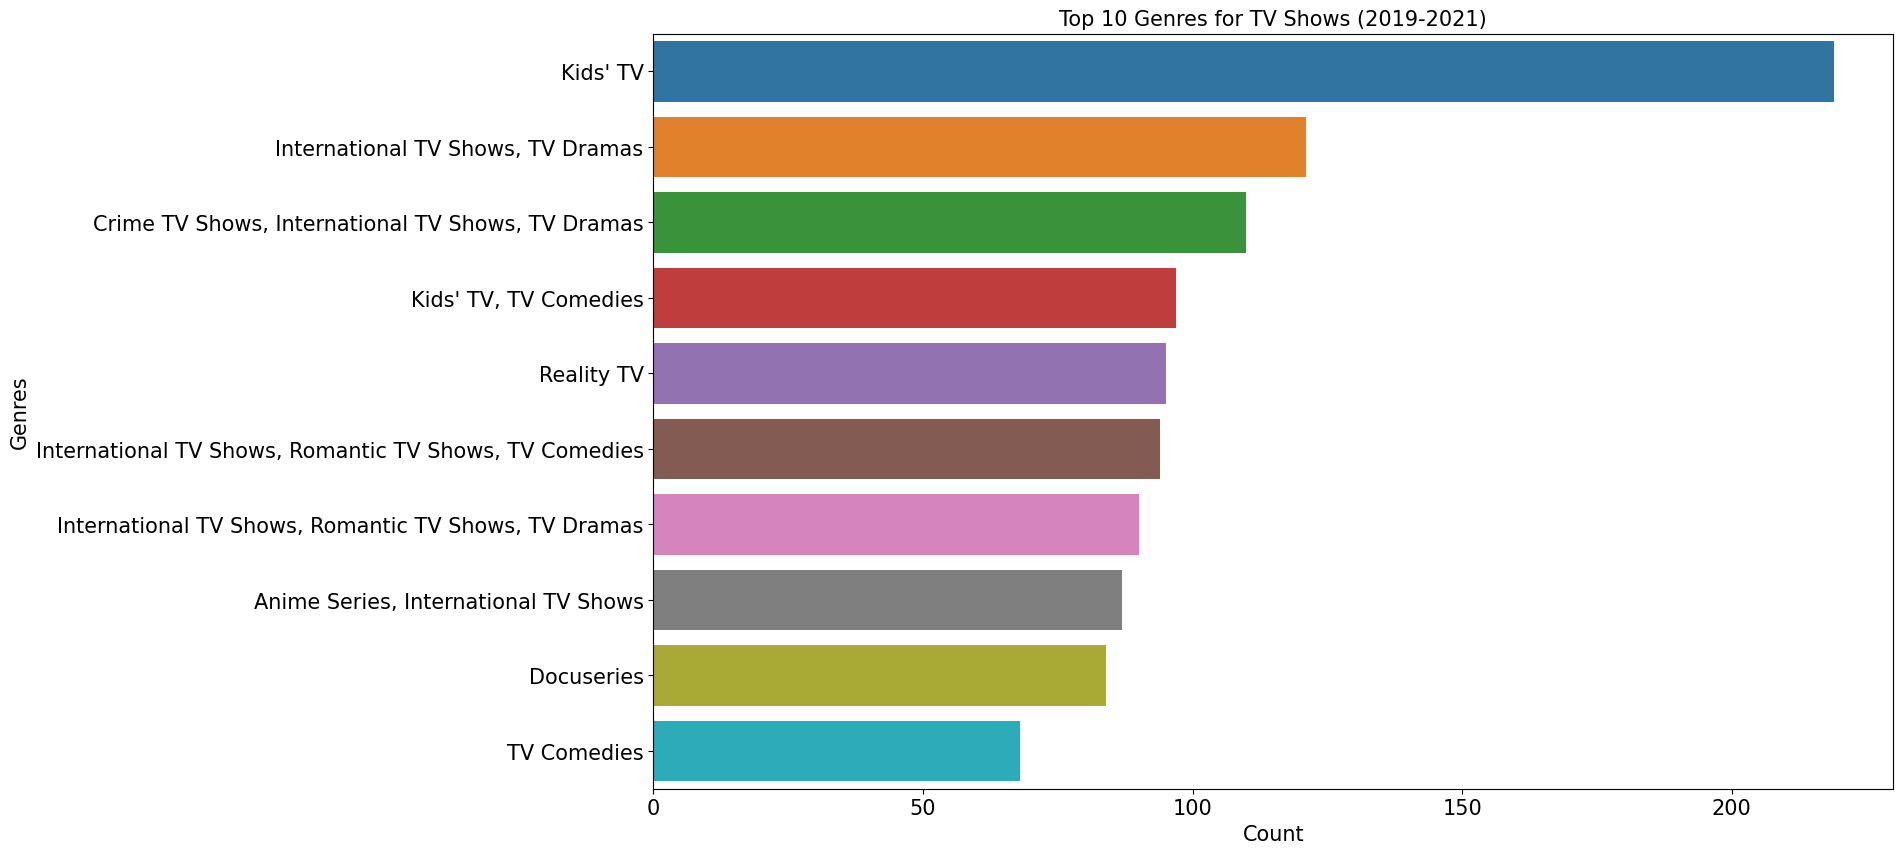

In [11]:
tv_genres = titles_df['listed_in'][titles_df.type == 'TV Show']

plt.figure(figsize=(16,10), dpi=100)
genre = sns.countplot(y = tv_genres, order=tv_genres.value_counts().index[:10])
plt.title('Top 10 Genres for TV Shows (2019-2021)', size=15)
plt.xlabel('Count', size=15)
plt.ylabel('Genres', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('../The-First-Project/top10_tv_genres.png')
plt.show()

# Pie charts - Derek

What was the popular type of entertainment on Netflix during the pandemic?

https://www.kaggle.com/datasets/prasertk/netflix-daily-top-10-in-us

In [ ]:
# importing CSV and creating a DataFrame
file = "./Resources/netflix_daily_top_10.csv"
netflix_df = pd.read_csv(file)
netflix_df.head()

In [ ]:
# changing the NaN value to 'No' in the column titled 'Netflix Exclusive'
netflix_df["Netflix Exclusive"] = netflix_df["Netflix Exclusive"].fillna("No")
netflix_df

In [ ]:
# filtering the data to only pull the information for the 2nd quarter of 2020
q2_2020 = netflix_df.loc[(netflix_df["As of"] >= "2020-04-01") & (netflix_df["As of"] <= "2020-06-30")]

In [ ]:
# creating variables to hold the numerical values that will be incorporated into the pie chart
q220_exclusive_tv = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "Yes") & (q2_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
q220_non_exclusive_tv = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "No") & (q2_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
q220_exclusive_movie = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "Yes") & (q2_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
q220_non_exclusive_movie = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "No") & (q2_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
q220_exclusive_comedy = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "Yes") & (q2_2020["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()

# creating variables to hold the information that will be used to create the pie chart
q220_exclusive_list = [q220_exclusive_tv, q220_non_exclusive_tv, q220_exclusive_movie, q220_non_exclusive_movie, 
                  q220_exclusive_comedy]
q220_exclusive_names = ["Exclusive TV Shows", "Non-Exclusive TV Shows", "Exclusive Movies",
                        "Non-Exclusive Movies", "Exclusive Comedy Specials"]
colors = ["skyblue", "orange", "teal", "green", "red"]
explode = (0, 0, 0, 0, 0.8)

# creating the pie chart using the variables previously created. Also, printing the image to the folder to use in powerpoint
plt.pie(q220_exclusive_list, explode=explode, labels=q220_exclusive_names, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Top 10 In the US By Type and Netflix Exclusive (Q2 of 2020)")
plt.axis("equal")
plt.savefig("./Images/q22020-pie.png", bbox_inches='tight')

In [ ]:
# filtering the data to only pull the information for the 4th quarter of 2020
q4_2020 = netflix_df.loc[(netflix_df["As of"] >= "2020-10-01") & (netflix_df["As of"] <= "2020-12-31")]

In [ ]:
# creating variables to hold the numerical values that will be incorporated into the pie chart
q420_exclusive_tv = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "Yes") & (q4_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
q420_non_exclusive_tv = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "No") & (q4_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
q420_exclusive_movie = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "Yes") & (q4_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
q420_non_exclusive_movie = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "No") & (q4_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
q420_exclusive_comedy = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "Yes") & (q4_2020["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()
q420_exclusive_concert = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "Yes") & (q4_2020["Type"] == "Concert/Perf…")]["Netflix Exclusive"].count()

# creating variables to hold the information that will be used to create the pie chart
q420_exclusive_list = [q420_exclusive_tv, q420_non_exclusive_tv, q420_exclusive_concert, q420_exclusive_movie, q420_non_exclusive_movie, 
                       q420_exclusive_comedy]
q420_exclusive_names= ["Exclusive TV Shows", "Non-Exclusive TV Shows", "Exclusive Concert",
                       "Exclusive Movies", "Non-Exclusive Movies", "Exclusive Comedy Specials"]
q420_colors = ["skyblue", "orange", "lawngreen", "teal", "green", "red"]
explode = (0, 0, 0.8, 0, 0, 0.8)

# creating the pie chart using the variables previously created. Also, printing the image to the folder to use in powerpoint
plt.pie(q420_exclusive_list, explode=explode, labels=q420_exclusive_names, colors=q420_colors, autopct="%1.1f%%", startangle=180)
plt.title("Top 10 In the US By Type and Netflix Exclusive (Q4 of 2020)")
plt.axis("equal")
plt.savefig("./Images/q42020-pie.png", bbox_inches='tight')

In [ ]:
# filtering the data to only pull the information for the 2nd quarter of 2021
q2_2021 = netflix_df.loc[(netflix_df["As of"] >= "2021-04-01") & (netflix_df["As of"] <= "2021-06-30")]

In [ ]:
# creating variables to hold the numerical values that will be incorporated into the pie chart
q221_exclusive_tv = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "Yes") & (q2_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
q221_non_exclusive_tv = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "No") & (q2_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
q221_exlusive_movie = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "Yes") & (q2_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
q221_non_exclusive_movie = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "No") & (q2_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
q221_exlusive_comedy = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "Yes") & (q2_2021["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()

# creating variables to hold the information that will be used to create the pie chart
q221_exclusive_list = [q221_exclusive_tv, q221_non_exclusive_tv, q221_exlusive_movie, q221_non_exclusive_movie, 
                       q221_exlusive_comedy]
q221_exclusive_names= ["Exclusive TV Shows", "Non-Exclusive TV Shows", "Exclusive Movies",
                       "Non-Exclusive Movies", "Exclusive Comedy Specials"]
colors_21 = ["skyblue", "orange", "teal", "green", "red"]
explode = (0, 0, 0, 0, 0.8)

# creating the pie chart using the variables previously created. Also, printing the image to the folder to use in powerpoint
plt.pie(q221_exclusive_list, explode=explode, labels=q221_exclusive_names, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Top 10 In the US By Type and Netflix Exclusive (Q2 of 2021)")
plt.axis("equal")
plt.savefig("./Images/q22021-pie.png", bbox_inches='tight')

In [ ]:
# filtering the data to only pull the information for the 4th quarter of 2021
q4_2021 = netflix_df.loc[(netflix_df["As of"] >= "2021-10-01") & (netflix_df["As of"] <= "2021-12-31")]

In [ ]:
# creating variables to hold the numerical values that will be incorporated into the pie chart
q421_exclusive_tv = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "Yes") & (q4_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
q421_non_exclusive_tv = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "No") & (q4_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
q421_exclusive_movie = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "Yes") & (q4_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
q421_non_exclusive_movie = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "No") & (q4_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
q421_exclusive_comedy = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "Yes") & (q4_2021["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()

# creating variables to hold the information that will be used to create the pie chart
q421_exclusive_list = [q421_exclusive_tv, q421_non_exclusive_tv, q421_exclusive_movie, q421_non_exclusive_movie, 
                       q421_exclusive_comedy]
q421_exclusive_names= ["Exclusive TV Shows", "Non-Exclusive TV Shows", "Exclusive Movies", 
                       "Non-Exclusive Movies", "Exclusive Comedy Specials"]
q421_colors = ["skyblue", "orange", "teal", "green", "red"]
explode = (0, 0, 0, 0, 0.8)

# creating the pie chart using the variables previously created. Also, printing the image to the folder to use in powerpoint
plt.pie(q421_exclusive_list, explode=explode, labels=q421_exclusive_names, colors=q421_colors, autopct="%1.1f%%", startangle=180)
plt.title("Top 10 In the US By Type and Netflix Exclusive (Q4 of 2021)")
plt.axis("equal")
plt.savefig("./Images/q42021-pie.png", bbox_inches='tight')

# Daily Top 10 Charts - Matthew



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
import matplotlib.dates as mdates
import scipy.stats as stats

from datetime import datetime


netflix_data = "resources/netflix_daily_top_10.csv"
netflix_titles_source = "resources/netflix_titles.csv"
netflix = pd.read_csv(netflix_data)
netflix_titles = pd.read_csv(netflix_titles_source)

# Create a New DataFrame That Shows Change in Rank Over Time

IMPORTANT: DO NOT RUN THIS NEXT CODE BLOCK

This is here to demonstrate how I made the netflix-daily-top-10-ranking-trends.csv file and does not need to be run again
The next code block reads from that csv file, so that one must be run

In [ ]:
# This code works, but it takes a really long time to complete (like 10+ minutes)

# Here I'm trying to get a list of all the unique dates and turn them into datetime objects so I can sort them
# The intent here is to build a dataframe with all the dates in a single column and then rankings on that date for an individual show in another 
# You can probably give it a column for every show to make graphing a shows change in position over time easier
as_of_dates = netflix["As of"].unique()
as_of_datetime = []

for date in as_of_dates:
    as_of_datetime.append(datetime.strptime(date, '%Y-%m-%d'))
as_of_datetime.sort()
as_of_datetime

# Make a dictionary with the 'as of' dates and every title that appears in the dataset as a key,
# and its value being a list of that title's rank on that day

# We start first with a dictionary of empty lists
ranking_trend = {"As of": []}

# We give it an empty list for each title
for title in netflix["Title"].unique():
    ranking_trend[title] = []
ranking_trend

# We loop through every date
for date in as_of_datetime:
    
    # Add that date to our ranking_trend dictionary
    ranking_trend["As of"].append(date)
    
    # Define this as the daily top 10 on that date
    daily_top_10 = netflix.loc[netflix["As of"] == date.strftime('%Y-%m-%d')]
    
    # Loop through each title that we have
    for title in netflix["Title"].unique():
        
        is_in_top_10 = False
        # Check if that title is in today's daily top 10 by going through each line
        # Then, if found, append its rank
        for i in range(10):
            
            top_10_line = daily_top_10.iloc[i]
            if top_10_line["Title"] == title:
                ranking_trend[title].append(top_10_line["Rank"])
                
                # If we found it in the top ten then set this variable to true
                is_in_top_10 = True
        
        # If it wasn't in the top 10 then we simply add "None" to the list
        if is_in_top_10 == False:
            ranking_trend[title].append(None)
    print(f"{date} is done")
    
ranking_df = pd.DataFrame(ranking_trend)
ranking_df.set_index("As of")
ranking_df.to_csv("resources/netflix-daily-top-10-ranking-trends.csv", index=False)

This code block reads from the dataframe that was made in the last block

In [2]:
ranking_df = pd.read_csv("resources/netflix-daily-top-10-ranking-trends.csv")
ranking_df

,As of,"Tiger King: Murder, Mayhem …",Ozark,All American,Blood Father,The Platform,Car Masters: Rust to Riches,Unorthodox,Love is Blind,Badland,...,Restless,Worst Roommate Ever,Shrek 2,Battleship,Just Like Heaven,Against the Ice,The Weekend Away,Pieces of Her,Shrek,Shooter
0,2020-04-01,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-02,1.0,2.0,3.0,6.0,9.0,10.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-03,1.0,2.0,3.0,10.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-04,1.0,2.0,4.0,NaN,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-05,1.0,2.0,5.0,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2022-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,2.0,8.0,NaN,10.0,NaN,6.0,1.0,9.0,NaN
706,2022-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,3.0,8.0,NaN,NaN,NaN,7.0,1.0,9.0,NaN
707,2022-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,4.0,7.0,NaN,NaN,NaN,9.0,1.0,8.0,10.0
708,2022-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,5.0,9.0,NaN,NaN,NaN,NaN,1.0,10.0,8.0


# Create a DataFrame for Total Days in Top 10

In [3]:
# Here I am creating a new dataframe that contains information about how many days a given title was in the top 10

# Get the list of unique titles
titles_top_10 = netflix["Title"].unique()

# Get a list of all dates
time_period = ranking_df["As of"]

# We are going to get a list of days those titles were in the top 10, we start with an empty list
max_days_in_top_10 = {
    "Title": [],
    "Max Days in Top 10": [],
    "Type": [],
    "Netflix Exclusive": []
}

# Loop through the titles and get the max number of days it was in the top 10 (This would be the total number of days it shows up)
for title in titles_top_10:
    max_days_in_top_10["Title"].append(title)
    max_days_in_top_10["Max Days in Top 10"].append(netflix["Days In Top 10"].loc[netflix["Title"] == title].max())
    max_days_in_top_10["Type"].append(netflix["Type"].loc[netflix["Title"] == title].iloc[0])
    max_days_in_top_10["Netflix Exclusive"].append(netflix["Netflix Exclusive"].loc[netflix["Title"] == title].iloc[0])

max_days_in_top_10

# Turn that into a dataframe
max_days_in_top_10_df = pd.DataFrame(max_days_in_top_10)
max_days_in_top_10_df

,Title,Max Days in Top 10,Type,Netflix Exclusive
0,"Tiger King: Murder, Mayhem …",37,TV Show,Yes
1,Ozark,89,TV Show,Yes
2,All American,66,TV Show,NaN
3,Blood Father,7,Movie,NaN
4,The Platform,10,Movie,Yes
...,...,...,...,...
640,Against the Ice,2,Movie,Yes
641,The Weekend Away,6,Movie,Yes
642,Pieces of Her,7,TV Show,Yes
643,Shrek,7,Movie,NaN


In [4]:
# I want to split the data up between netflix exclusives vs. non-exclusives and tv shows vs movies,
# so I define a series of variables that are lists of show titles that fit the criteria

# Get a list of all the TV Shows in the set
shows = netflix["Title"].loc[netflix["Type"] == 'TV Show'].unique()

# Then a list of all Movies
movies = netflix["Title"].loc[netflix["Type"] == 'Movie'].unique()

# Stand-up and Concerts are next, although I never end up using them
stand_up = netflix["Title"].loc[netflix["Type"] == 'Stand-Up Comedy'].unique()
concert = netflix["Title"].loc[netflix["Type"] == 'Concert/Perf…'].unique()

# Here I get a list of all netflix/non-netflix nows/movies
shows_netflix_exclusive = netflix["Title"].loc[(netflix["Type"] == 'TV Show') & (netflix["Netflix Exclusive"] == "Yes")].unique()
shows_not_netflix_exclusive = netflix["Title"].loc[(netflix["Type"] == 'TV Show') & (netflix["Netflix Exclusive"] != "Yes")].unique()
movies_netflix_exclusive = netflix["Title"].loc[(netflix["Type"] == 'Movie') & (netflix["Netflix Exclusive"] == "Yes")].unique()
movies_not_netflix_exclusive = netflix["Title"].loc[(netflix["Type"] == 'Movie') & (netflix["Netflix Exclusive"] != "Yes")].unique()

print(f"""
Number of Shows  : {len(shows)}
Number of Movies : {len(movies)}
Number of Stand Up : {len(stand_up)}
Number of Concerts : {len(concert)}
""")



Number of Shows  : 283
Number of Movies : 355
Number of Stand Up : 6
Number of Concerts : 1



In [6]:

# Now I create a pandas series of the mean ranking of shows/movies/etc.

shows_rank = netflix["Rank"].loc[netflix["Type"] == 'TV Show'].mean()
movies_rank = netflix["Rank"].loc[netflix["Type"] == 'Movie'].mean()
stand_up_rank = netflix["Rank"].loc[netflix["Type"] == 'Stand-Up Comedy'].mean()
concert_rank = netflix["Rank"].loc[netflix["Type"] == 'Concert/Perf…'].mean()

print(f"""
Average Rank of Shows  : {shows_rank}
Average Rank of Movies : {movies_rank}
Average Rank of Stand Up : {stand_up_rank}
Average Rank of Concerts : {concert_rank}
""")



Average Rank of Shows  : 5.422177237966712
Average Rank of Movies : 5.635005744925316
Average Rank of Stand Up : 5.439024390243903
Average Rank of Concerts : 3.5



In [8]:
# Here I pull data from the ranking_df dataframe to make a new dataframe that will show the changes of rank of the different
# categories over time

shows_mean_ranking = ranking_df[shows].mean(axis=1)
movies_mean_ranking = ranking_df[movies].mean(axis=1)
stand_up_mean_ranking = ranking_df[stand_up].mean(axis=1)
concert_mean_ranking = ranking_df[concert].mean(axis=1)

netflix_shows_mean_ranking = ranking_df[shows_netflix_exclusive].mean(axis=1)
non_netflix_shows_mean_ranking = ranking_df[shows_not_netflix_exclusive].mean(axis=1)
netflix_movies_mean_ranking = ranking_df[movies_netflix_exclusive].mean(axis=1)
non_netflix_movies_mean_ranking = ranking_df[movies_not_netflix_exclusive].mean(axis=1)

daily_top_10_mean_ranking_df = pd.DataFrame(data={
    "As of":time_period,
    "Shows":shows_mean_ranking,
    "Movies":movies_mean_ranking,
    "Stand-up":stand_up_mean_ranking,
    "Concert":concert_mean_ranking,
    "Netflix Shows":netflix_shows_mean_ranking,
    "Non Netflix Exclusive Shows":non_netflix_shows_mean_ranking,
    "Netflix Movies":netflix_movies_mean_ranking,
    "Non Netflix Movies":non_netflix_movies_mean_ranking
})

In [9]:
daily_top_10_mean_ranking_df.median()

C:\Users\wallh\AppData\Local\Temp/ipykernel_8544/158785766.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily_top_10_mean_ranking_df.median()


Shows                          5.428571
Movies                         5.666667
Stand-up                       4.000000
Concert                        3.500000
Netflix Shows                  5.000000
Non Netflix Exclusive Shows    6.333333
Netflix Movies                 5.000000
Non Netflix Movies             6.666667
dtype: float64

Text(0, 0.5, 'Position in the Daily Top 10')

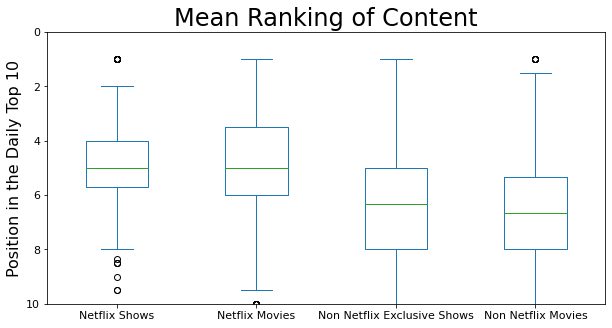

In [10]:
ax1 = daily_top_10_mean_ranking_df[["Netflix Shows","Netflix Movies", "Non Netflix Exclusive Shows", "Non Netflix Movies"]].plot(kind="box", figsize=(10,5), ylim=(10,0), fontsize=11)
ax1.set_title("Mean Ranking of Content", fontdict={'fontsize':24})
ax1.set_ylabel("Position in the Daily Top 10", fontdict={'fontsize':16})

In [11]:
# Remove Cocomelon since it's such a huge outlier
max_days_in_top_10_df = max_days_in_top_10_df.loc[max_days_in_top_10_df["Title"] != "Cocomelon"]

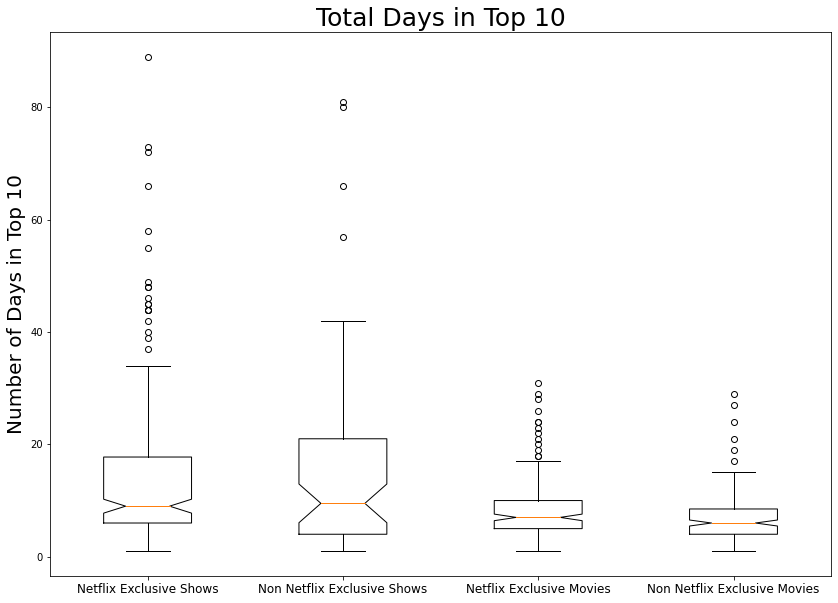

In [12]:
box_netflix_show = max_days_in_top_10_df["Max Days in Top 10"].loc[(max_days_in_top_10_df["Netflix Exclusive"] == "Yes") & 
                                                           (max_days_in_top_10_df["Type"] == "TV Show")]
box_netflix_movie = max_days_in_top_10_df["Max Days in Top 10"].loc[(max_days_in_top_10_df["Netflix Exclusive"] == "Yes") & 
                                                           (max_days_in_top_10_df["Type"] == "Movie")]
box_non_netflix_show = max_days_in_top_10_df["Max Days in Top 10"].loc[(max_days_in_top_10_df["Netflix Exclusive"] != "Yes") & 
                                                           (max_days_in_top_10_df["Type"] == "TV Show")]
box_non_netflix_movie = max_days_in_top_10_df["Max Days in Top 10"].loc[(max_days_in_top_10_df["Netflix Exclusive"] != "Yes") & 
                                                            (max_days_in_top_10_df["Type"] == "Movie")]
box_titles = ["Netflix Exclusive Shows",  "Non Netflix Exclusive Shows", "Netflix Exclusive Movies", "Non Netflix Exclusive Movies"]

fig1, ax1 = plt.subplots(figsize=(14,10))
ax1.set_title("Total Days in Top 10", fontsize=25)
ax1.set_ylabel("Number of Days in Top 10", fontsize=20)
ax1.boxplot([box_netflix_show, box_non_netflix_show, box_netflix_movie, box_non_netflix_movie], box_titles)
plt.xticks([1,2,3,4], box_titles, fontsize=12)


plt.show()

In [13]:
# We filter out Cocomelon since its such a huge outlier
max_days_in_top_10_df = max_days_in_top_10_df.loc[max_days_in_top_10_df["Title"] != "Cocomelon"]

# We are only concerned with movies and tv shows so we filter only for those
max_days_in_top_10_df = max_days_in_top_10_df.loc[(max_days_in_top_10_df["Type"] == "TV Show") | (max_days_in_top_10_df["Type"] == "Movie")]

max_days_in_top_10_df.fillna("No", inplace=True)
max_days_in_top_10_df = max_days_in_top_10_df.loc[max_days_in_top_10_df["Max Days in Top 10"] != "No"]
max_days_grouped = max_days_in_top_10_df.groupby(["Netflix Exclusive", "Type"])
max_days_grouped.median()

Max Days in Top 10
Netflix Exclusive Type                       
No                Movie                   6.0
                  TV Show                 9.5
Yes               Movie                   7.0
                  TV Show                 9.0

In [14]:
max_days_grouped.mean()

Max Days in Top 10
Netflix Exclusive Type                       
No                Movie              6.468571
                  TV Show           15.750000
Yes               Movie              8.238889
                  TV Show           14.328829

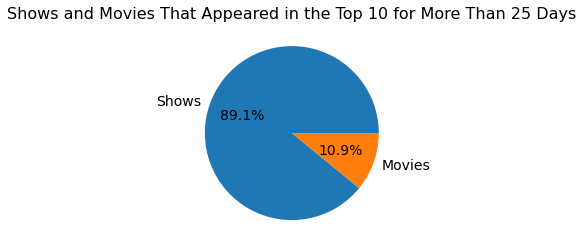

In [15]:
# We filter by things that were in the top 10 for more than 25 days

shows_in_top_10_for_more_than_25_days = max_days_in_top_10_df.loc[max_days_in_top_10_df["Max Days in Top 10"] >= 25]

show_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Type"] == "TV Show"])
movies_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Type"] == "Movie"])
netflix_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Netflix Exclusive"] == "Yes"])
non_netflix_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Netflix Exclusive"] != "Yes"])

fig1, ax1 = plt.subplots()
ax1.pie([show_pie, movies_pie], labels=["Shows", "Movies"], autopct='%1.1f%%', textprops={'fontsize':14})
plt.title("Shows and Movies That Appeared in the Top 10 for More Than 25 Days", fontsize=16)
plt.show()

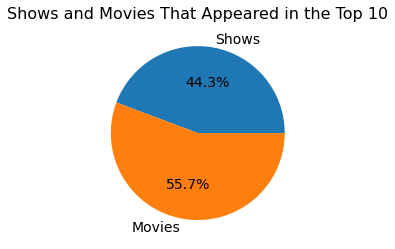

In [16]:
# I want to take a look at the overall distribution of movies and shows

shows_in_top_10_for_more_than_25_days = max_days_in_top_10_df

show_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Type"] == "TV Show"])
movies_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Type"] == "Movie"])
netflix_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Netflix Exclusive"] == "Yes"])
non_netflix_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Netflix Exclusive"] != "Yes"])

fig1, ax1 = plt.subplots()
ax1.pie([show_pie, movies_pie], labels=["Shows", "Movies"], autopct='%1.1f%%', textprops={'fontsize':14})
plt.title("Shows and Movies That Appeared in the Top 10", fontsize=16)
plt.show()